In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Datasets
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Henry\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
SDA_df = df[df['job_title_short'] == 'Senior Data Analyst'].copy()

In [12]:
SDA_companys = SDA_df.groupby('company_name').size()

In [17]:
SDA_companys = SDA_companys.reset_index()
SDA_companys.columns = ['company_name', 'count']

In [25]:
SDA_top_5 = SDA_companys.sort_values(by='count', ascending=False).head(5)

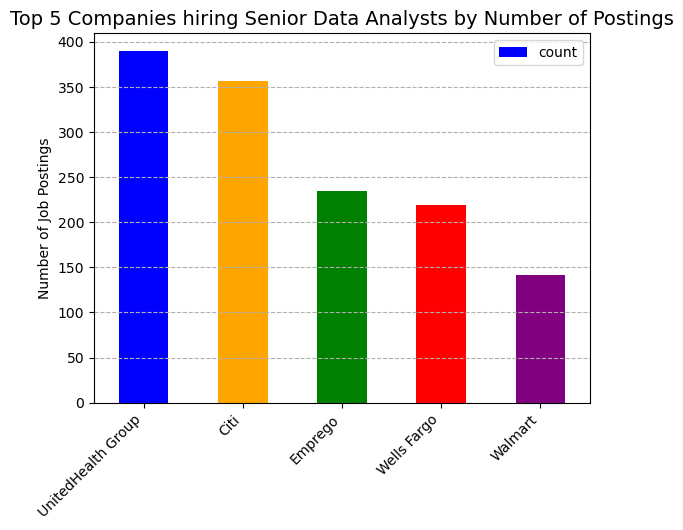

In [35]:
colors = ['blue', 'orange', 'green', 'red', 'purple']

SDA_top_5.plot(
    kind='bar',
    x='company_name',
    y='count',
    color = colors
    )
plt.xlabel('')
plt.ylabel('Number of Job Postings')
plt.title('Top 5 Companies hiring Senior Data Analysts by Number of Postings', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.show()
